In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os


c:\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\python39\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
img_width=128
img_height=128
img_size=(128,128)
img_channels=3

In [15]:
Directory = os.listdir("./train/train")

# Directory = r'C:\Users\KRISHNA\CatsDogData\train\train'

labels=[]
for name in Directory:
    label =name.split('.')[0]
    if label=='dog':
        labels.append(1)
    else:
        labels.append(0)

df=pd.DataFrame({
    'filename':Directory,
    'label':labels
})


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization

model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)       

In [18]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [19]:
earlystop = EarlyStopping(patience=10)

In [20]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [21]:
callbacks = [earlystop, learning_rate_reduction]

In [22]:
df["label"] = df["label"].replace({0: 'cat', 1: 'dog'}) 

In [23]:
train_data, validation_data = train_test_split(df, test_size=0.20, random_state=42)
train_data = train_data.reset_index(drop=True)
validation_data = validation_data.reset_index(drop=True)


In [24]:
final_train_data = train_data.shape[0]
final_validation_data = validation_data.shape[0]
batch_size=15

In [26]:
generate_train_data = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_gen = generate_train_data.flow_from_dataframe(train_data,
                                             "./train/train/",x_col='filename',y_col='label',
                                                 target_size=img_size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)


Found 20000 validated image filenames belonging to 2 classes.


In [28]:
generate_validation_data = ImageDataGenerator(rescale=1./255)
validation_gen = generate_validation_data.flow_from_dataframe(
    validation_data, 
    "./train/train/", 
    x_col='filename',
    y_col='label',
    target_size=img_size,
    class_mode='categorical',
    batch_size=batch_size
)


Found 5000 validated image filenames belonging to 2 classes.


In [32]:
# test_datagen = ImageDataGenerator(rotation_range=15,
#                                 rescale=1./255,
#                                 shear_range=0.1,
#                                 zoom_range=0.2,
#                                 horizontal_flip=True,
#                                 width_shift_range=0.1,
#                                 height_shift_range=0.1)

# test_generator = test_datagen.flow_from_dataframe(test_df,
#                                                  "./test1/test1/",
#                                                   x_col='filename',
#                                                   y_col='category',
#                                                   target_size=img_size,
#                                                   class_mode='categorical',
#                                                   batch_size=batch_size)

In [33]:
epochs=10
history = model.fit_generator(
    train_gen, 
    epochs=epochs,
    validation_data=validation_gen,
    validation_steps=final_validation_data//batch_size,
    steps_per_epoch=final_train_data//batch_size,
    callbacks=callbacks
)

c:\python39\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1333/1333 [==============================] - 1954s 1s/step - loss: 0.9362 - accuracy: 0.5932 - val_loss: 0.5398 - val_accuracy: 0.7237
Epoch 2/10
1333/1333 [==============================] - 1572s 1s/step - loss: 0.5610 - accuracy: 0.7256 - val_loss: 0.5155 - val_accuracy: 0.7522
Epoch 3/10
1333/1333 [==============================] - 1427s 1s/step - loss: 0.5090 - accuracy: 0.7591 - val_loss: 0.5508 - val_accuracy: 0.7399
Epoch 4/10
1333/1333 [==============================] - 1636s 1s/step - loss: 0.4629 - accuracy: 0.7833 - val_loss: 0.8108 - val_accuracy: 0.7143
Epoch 5/10
1333/1333 [==============================] - 1547s 1s/step - loss: 0.4451 - accuracy: 0.7920 - val_loss: 0.4604 - val_accuracy: 0.8114
Epoch 6/10
1333/1333 [==============================] - 1439s 1s/step - loss: 0.4037 - accuracy: 0.8198 - val_loss: 0.5642 - val_accuracy: 0.7716
Epoch 7/10
1333/1333 [==============================] - 1504s 1s/step - loss: 0.4116 - accuracy: 0.8186 - val_loss: 0.3320 -

In [34]:
model.save("model1_catsVSdogs_10epoch.h5")

In [35]:
test_filenames = os.listdir("./test1/test1")
test_data = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_data.shape[0]


In [37]:
generate_test_data= ImageDataGenerator(rescale=1./255)
test_gen = generate_test_data.flow_from_dataframe(
    test_data, 
    "./test1/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [38]:
prediction = model.predict_generator(test_gen, steps=np.ceil(nb_samples/batch_size))

c:\python39\lib\site-packages\keras\engine\training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [39]:
test_data['label'] = np.argmax(prediction, axis=-1)

label_map = dict((v,k) for k,v in train_gen.class_indices.items())
test_data['label'] = test_data['label'].replace(label_map)

test_data['label'] = test_data['label'].replace({ 'dog': 1, 'cat': 0 })


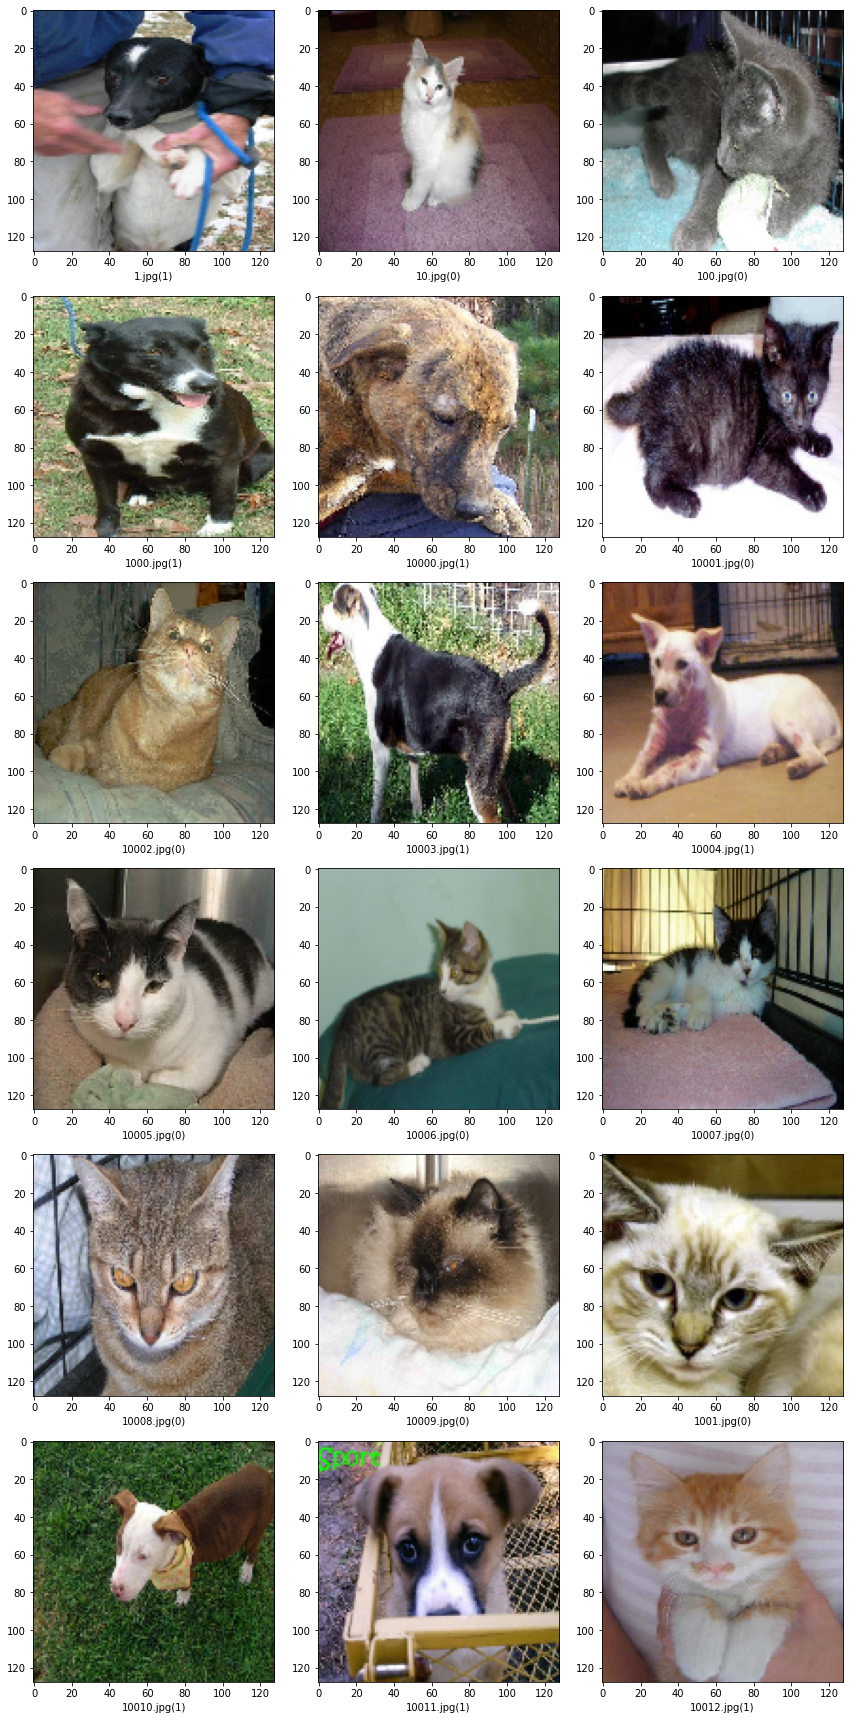

In [41]:
testing = test_data.head(10)
testing.head()
plt.figure(figsize=(12, 24))
for index, row in testing.iterrows():
    filename = row['filename']
    label = row['label']
    image = load_img("./test1/test1/"+filename, target_size=img_size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(label) + ')' )
plt.tight_layout()
plt.show()

In [42]:
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("download1.jpg")
im=im.resize(img_size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print(pred,results[pred])

c:\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0 cat


In [43]:
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("download2.jpg")
im=im.resize(img_size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print(pred,results[pred])

c:\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1 dog
